<a href="https://colab.research.google.com/github/mohamedshouaib/iti/blob/main/NLP/tasks/task4_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

- Forward pass
- Calculate the loss
- Zero gradients
- Perform backpropagation on the loss
- Update the optimizer (gradient descent)

In [ ]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

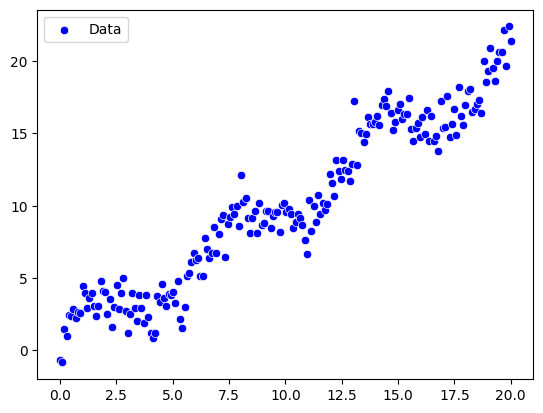

In [ ]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [ ]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [ ]:
df = Simple1DRegressionDataset(X,y)


In [ ]:
df[0]


(tensor([0.]), tensor([-0.6681]))

In [ ]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [ ]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[10.2172]])]

In [ ]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)
model_2 = nn.Sequential(
    nn.Linear(in_features, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_features)
)

In [ ]:
loss_fn = nn.MSELoss()

In [ ]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [ ]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=20
                )


Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

117.38949584960938
117.52147847414017
136.37885266542435
171.40311414003372
339.53896313905716
364.95687848329544
474.3849027752876
576.8844831585884
797.6537092328072
901.6833570599556
991.4596403241158
1014.7072179913521
1100.1467168927193
1342.533603489399
1568.3167150616646
1646.2597158551216
1725.820827305317
1952.5839346051216
1993.1376913189888
2191.151698887348
2255.6812017560005
2482.0080907940865
2540.816535770893
2645.858451664448
2740.292999088764
2969.9793851971626
3271.3661039471626
3330.593272984028
3423.417278110981
3492.032558262348
3731.7889516949654
3743.099377453327
3864.555805981159
3868.0768941044807
3946.800359070301
4143.371358215809
4148.173651993275
4150.6996975541115
4361.512411177158
4446.60572630167
4531.789220869541
4777.23845487833
5019.059118330479
5023.806699812412
5156.514631330967
5164.064650118351
5165.734460771084
5184.008436143398
5253.8622569441795
5253.951429270208
5486.902311228216
5722.7982615455985
5904.986204050481
5908.7921082004905
6103.131

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

173.63357543945312
174.058385938406
319.736608594656
464.154577344656
510.853006452322
514.307379335165
689.7436128556728
819.1971651017666
968.5450349748135
981.0231328904629
991.617045968771
1165.0928302705288
1316.6642108857632
1361.8870693147182
1588.111846536398
1942.5559078156948
2200.2965999543667
2250.2808872163296
2392.4285922944546
2421.6168876588345
2763.5642143189907
2853.171094506979
2871.611566156149
2972.4329467713833
2972.4340624627657
2974.1691195783205
3036.8593776044436
3221.3861872968264
3346.647829752881
3459.87888596626
3540.788683634717
3543.167533141095
3730.708502989728
3770.7065269765444
3942.2460777577944
4121.611266356427
4127.6013929662295
4134.744270544965
4167.128082495648
4167.141502551269
4423.837272814941
4485.6745225708
4569.385704211425
4592.851120166015
4729.14482133789
4764.901439837646
5064.313701800536
5064.33025371423
5089.944238775875
5090.119557434227
5222.970234924462
5346.974881225731
5374.82747750869
5375.00042710593
5375.062220772263
5375.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7565165162086487
13.998126089572906
14.979183197021484
129.90435409545898
143.67143726348877
150.15314531326294
157.69657373428345
178.2706093788147
185.7563238143921
264.7228078842163
283.99510860443115
286.78952050209045
333.46709084510803
337.2790253162384
416.1119034290314
437.54121136665344
454.7954246997833
729.2957298755646
838.8848259449005
924.4643700122833
934.2694971561432
944.6256868839264
955.4265682697296
1001.9317066669464
1002.6258899569511
1112.0412799715996
1112.126828983426
1211.6378687173128
1220.8564737588167
1276.493539646268
1396.220994785428
1403.7372229844332
1406.557586506009
1422.0413082391024
1463.9538982659578
1488.7055938988924
1494.758550003171
1607.8008549958467
1732.1034444123507
1746.516308143735
1877.4580500870943
1895.532472923398
1916.2167933732271
1936.7236579209566
1944.3505600243807
2165.3371475487947
2179.4310930520296
2291.5362184792757
2417.1518495827913
2420.210817411542
2503.732103422284
2542.9175816327333
2645.6546574383974
2650.658543661

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

28.923030853271484
134.7248878479004
267.32040786743164
458.2194404602051
460.97207403182983
515.1020827293396
718.6431441307068
723.9628839492798
745.1323862075806
761.6785573959351
857.602988243103
932.3132314682007
1080.0779104232788
1087.588002204895
1089.096868634224
1219.8342343568802
1246.198461651802
1328.898412823677
1350.4910298585892
1356.4281550645828
1358.0718969106674
1428.635365843773
1512.347768187523
1614.0980657339096
1775.509290099144
1794.5133908987045
1794.9963657557964
1845.6841518580914
1887.1650058925152
1911.5152485072613
1912.340177565813
1927.1208162605762
1930.0567777454853
1941.3148143589497
2021.5187938511372
2058.5979183018208
2100.4552905857563
2107.867700845003
2108.1785393953323
2108.8690755963326
2116.1302126049995
2172.202382862568
2209.5950258374214
2214.3862317204475
2235.522683441639
2239.017340004444
2239.381565362215
2257.4309923946857
2282.278745919466
2343.620371133089
2344.4772028028965
2377.15463963151
2408.9132837355137
2471.755786329508
25

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.541489601135254
33.42298221588135
48.969380378723145
49.05874361842871
90.8953143581748
92.18242528289557
106.01503064483404
113.89145638793707
123.79521157592535
145.3787858709693
166.94986321777105
201.01217248290777
206.90296914428473
229.47245576232672
465.26428010314703
481.94835069030523
485.8147275671363
510.49094178527594
623.9814965948462
640.6005456671119
648.1185872778296
727.7829625830054
729.5009443983436
815.936727784574
817.54085149616
825.6234702095389
828.0427242740989
831.0851017460227
864.1391788944602
1022.620822571218
1029.1098042950034
1030.3340361341834
1034.2409296259284
1065.1177358850837
1067.0201968178153
1114.6023196205497
1138.554321192205
1191.6007155403495
1192.2308405861259
1222.2499903663993
1318.8403223976493
1318.8516609212384
1322.605020239018
1322.6098803570494
1327.0483545353636
1405.5244745304808
1408.3848361065611
1432.5840109875426
1484.076736359857
1540.450042634271
1695.5211943676695
1695.6366764744744
1705.7330786427483
1727.8871790608391
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

35.11302947998047
53.31137275695801
53.39056822657585
53.538319408893585
139.96176606416702
175.8968055844307
359.68153458833694
385.5266769528389
481.4969375729561
483.2802705168724
529.2366265654564
550.145247399807
550.1850176267326
550.5286176018417
550.6572756282985
604.2594866268337
606.7010120861232
606.7409811168909
607.4343446046114
608.1681241542101
627.7735223323107
627.7737627618626
630.1824787252262
630.2593184255675
691.7365713857725
692.2860046171263
719.0721793912962
719.1943581022933
759.2378113188461
761.035178295584
828.1274100460723
832.2884904064849
872.1331368603423
917.2613335766509
957.6512490429595
987.0802460827545
988.3897460617736
988.4292394810036
1029.1854612522438
1089.0725385837868
1112.6693193607643
1128.5945398502663
1129.7865664654091
1186.0928980999306
1187.4860573702172
1211.5640469484642
1214.7902229719475
1235.6912926130608
1304.9774788313225
1334.4653290205315
1387.052666514428
1469.1534202986077
1521.9558227949456
1557.0391548567131
1581.4788788

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

30.166339874267578
75.70668411254883
142.4174461364746
189.7951545715332
190.0854016840458
262.2539578974247
268.790281444788
277.3913051187992
277.45184847712517
289.9255423247814
325.1926779448986
365.5467276275158
423.5750136077404
440.8516554534435
476.3353209197521
523.9401831328869
543.8191275298595
573.5011400878429
579.9145469367504
581.7981943786144
591.2924809157848
654.6474003493786
656.4618328511715
662.5771916806698
662.7983309030533
669.1980377435684
669.2596407160163
686.3307562097907
686.351045453921
686.3512507729174
708.4398375801684
720.5156146340014
773.6866771034838
774.837630992377
775.0252067945839
811.8202316664101
835.1586906813027
857.5279190443398
875.5342705152871
907.0166294477822
953.9237568281533
963.7846920393349
964.7946205042244
971.1890354059578
1103.7202243708016
1175.771112432325
1180.5956692598702
1199.141048898542
1199.1416037721501
1387.4888632936345
1409.1092093629704
1472.0825827760564
1472.0828135738848
1519.3024638424395
1559.5657389889238
15

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2197524905204773
2.25647634267807
7.069501340389252
13.291540086269379
13.486480608582497
25.228200808167458
229.35541333258152
317.402280703187
361.1963366419077
364.1301905065775
419.58011116087437
439.26333297789097
483.8720022588968
513.5831495672464
513.6437520757318
516.8404474034905
516.851514604874
523.0802753241733
555.136366632767
607.195994165726
626.9452007086948
650.996172693558
651.3568841787055
699.8699495168403
701.4111768575385
749.4341260762885
758.6387893529609
759.2271737428382
907.0852364869788
912.3733248086646
914.7811290593818
937.3930599065498
937.3934035108832
945.4551205442694
984.9524349973944
1000.377187232807
1001.0217274235038
1049.5128048465995
1088.5644444034842
1151.0336864994315
1162.460485319927
1170.629376272991
1170.774356047943
1318.2124206231383
1330.790209929779
1353.671349685028
1431.7690898583678
1493.7592860863952
1525.370038192108
1538.637764136627
1656.9487153695372
1660.5746261285094
1660.7715549127606
1691.3654155389813
1757.61012073917

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

75.13887023925781
79.8637523651123
79.93074981123209
100.2258872166276
100.23902916256338
245.93260216061026
294.66194176021963
354.5908129150048
354.60187831055373
354.676131981425
401.9749143300578
458.6560781178996
462.6216259179637
463.9495945153758
465.2430056510493
481.9170817313716
508.5047930656001
520.6827849326655
528.3016337333247
536.1916994033381
536.6254305718467
538.9693977711722
539.2630933402106
598.8950666068122
675.3307508109137
676.9485900280997
699.4861724255607
704.2834694264457
731.6056988118216
748.3729526875541
773.077656972222
852.8526966450736
886.1464397786185
886.2872729925439
907.1332336096093
908.1686542658135
936.2446830896661
979.0644691614434
980.938879433088
997.3712009815499
1045.4218563465402
1059.936440887861
1064.026625099592
1099.0156196979806
1099.6342964200303
1114.2847690610215
1128.1201162366197
1129.8146722344682
1129.856622162275
1149.4780573276803
1166.1306318668649
1169.3660747436807
1176.7641856102273
1176.7642485449323
1227.923844034434

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

27.337644577026367
29.69764757156372
39.59560823440552
42.539536237716675
48.66335654258728
53.730931520462036
55.57391667366028
64.07297348976135
64.07300542083613
106.59305165496698
109.04220078674189
135.47688554015986
135.49361935419074
136.0620442943
164.9524137095832
165.67092350286475
165.80015684825412
185.24016501170627
188.2143027947568
210.6882846520566
223.5073058770322
224.02556415063373
224.10888877672187
228.86509958070747
252.48565164369575
260.67284456056586
265.24161115449897
273.9323288516425
275.7564910964393
275.9282303915643
291.9505539999627
292.6092713342332
304.4658377633714
307.93791251045695
334.3065610395097
334.64421107036105
341.9257180855893
422.4915139840268
439.6980970070981
441.8008439705991
565.5572602913999
579.3545043633603
581.4032447503232
583.3996765778684
583.4367285573207
589.0811572873317
589.4848817193233
591.3814686143123
613.768620332452
647.8925484025203
648.0737195217334
650.9558255874836
654.1386258804523
669.0259454452716
677.8773458206

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

20.010211944580078
27.159299850463867
29.232236862182617
30.738552927970886
33.26254189014435
86.8308516740799
87.50027030706406
94.21493285894394
104.99619048833847
106.54749065637589
116.06138569116592
117.077487885952
117.10629128478467
118.47090124152601
126.43309330008924
132.3505594637245
137.22233795188367
138.98555492423475
139.00666234642267
146.4410600438714
148.05970118194818
148.06663143448532
148.92177432589233
149.37087765149772
154.25032225064933
154.46361549012363
155.4627573620528
156.86609913222492
157.90977693907917
160.9813792835921
168.42359043471515
172.74560715071857
184.2234504353255
250.48434521071613
304.5334327351302
346.21484447829425
355.58862472884357
370.3705175053328
377.6449773442
391.12298847548664
414.46872211806476
428.2341106068343
431.1015410553664
437.65584136359394
452.37239409796894
452.3795402040705
454.61776399519295
459.7696747770533
465.10564470198005
467.38495063688606
470.4223082056269
472.12330853845924
473.8976411810145
474.1637542834505

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.907451331615448
14.60596913099289
14.642391860485077
14.82961468398571
16.46363465487957
33.91528336703777
50.38704888522625
51.4957639425993
58.94023339450359
65.00677315890789
65.21858601272106
66.5011588782072
66.50662428000942
71.1795969591476
71.69607102731243
75.95308959344402
92.10036170342937
112.59307563165203
140.51797950128093
152.64595210412517
153.085098026786
160.0867569432594
181.53349614003673
181.7886667237617
185.41476631024852
190.02448701718822
214.62423372128978
218.4691972718574
222.26296114781871
247.04814219335094
259.0755660519935
259.0959444385953
282.6768751484342
293.0894222599454
304.5268860203214
307.46374300541356
324.6139047485776
349.21807840885594
367.6122129303403
387.5349176269956
387.9166570645757
389.95597443403676
394.27320465864614
400.9505494576879
402.60078892530873
403.00395548762754
404.95010745944455
406.60121691646054
407.57973093213513
410.5929767531343
410.704142336268
411.08943641604856
417.90713108005
421.7100952905603
425.01529157580

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2631773352622986
0.46931715309619904
31.29956503212452
32.420611813664436
39.70116896927357
56.57706733047962
68.51420398056507
68.81449998915195
68.96932823956013
76.22564251720905
76.29292364418507
76.87911404669285
77.84279735386372
77.84328174535767
83.09354638998047
86.20377206747071
88.6923546785547
99.09960603658692
100.10576093141572
101.17037272398011
101.437165170355
115.59308901373879
140.32470598761574
141.01341232602135
142.22618314568535
144.11523494069115
144.20022086743847
145.85057060365216
145.91608953420655
146.5316691393091
149.30392885152833
151.20011258070008
152.26200234834687
155.6872354740335
158.14755189363495
158.26872978304164
159.8608908424212
160.71596977804438
165.55914185140864
165.56617569728405
177.13579582973034
179.86125993533642
184.80648994250805
210.65038108630688
211.02418681784184
216.4199039618543
221.26832839651615
222.27359005613835
222.71024793191464
224.04756337209255
224.06741171880276
224.19356913669617
227.61077971561463
227.6687693613

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2904655337333679
0.2982502584345639
1.4579607849009335
1.8343449239619076
1.8346257373632398
2.587372796231648
3.5619042083562817
3.9390891656221356
16.01151596158161
20.156719551974675
20.396372796589276
25.19011545329704
34.27394914775505
38.50325298457756
39.09745121150627
47.65715599208488
47.94465777426376
50.207444639498135
52.13461479693069
55.403922171884915
58.38053402453079
64.53751215487137
66.20268008261337
74.26706740408554
75.03932735472335
75.05081748831435
85.12550353872939
85.13504437971278
86.1760724024789
86.38429690766498
86.50184251982137
91.25371172148152
93.41218235212727
93.9122778387682
97.45709504801198
98.11267980057164
103.15019973236485
113.04308684784337
116.01447351890965
118.22632463890477
119.50638647991582
121.46029921490117
122.54942818600102
123.1388181062357
123.1618684871064
123.50859711001976
123.53290667812689
123.87019660751685
133.75148513595923
141.54074743072852
142.65779724399908
145.6980675725208
146.9830597905384
170.73446932117804
188.9

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.2328665256500244
4.774343729019165
4.775500469491817
6.148171835229732
6.455638491199352
8.770691000507213
14.900273405597545
16.850113116786815
17.871128403232433
28.90115865378175
31.28937967924867
34.452888332889415
47.162865482852794
49.71336325316224
55.49690970091615
102.98813589720521
108.08112820296083
112.77022370009217
113.23207046894822
113.23905242199544
114.32197976822499
123.08237767929677
123.18160030955914
123.18359266186599
145.20288167858962
146.4535686817253
148.3800207223976
154.5074792947853
154.51938842295203
159.41751454828773
159.63223633228336
161.6091370290378
162.36550095735583
162.67618107853923
162.67727808642667
176.77723555255216
185.61616854358
185.8877008705167
186.76728673267644
186.81726425129455
187.0434412433533
187.58910048741382
204.52810157078784
216.99614394444507
217.56564796704333
253.74853981274646
259.7323006464867
262.23301780957263
263.7341017796425
274.01993418473285
276.19462347764056
276.2446440717904
277.77214458200615
277.7771198613

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.274624347686768
15.355669498443604
18.026058197021484
18.674383103847504
23.874060571193695
45.47529309988022
47.23897606134415
48.04720139503479
48.79218262434006
50.50611060857773
50.767052471637726
50.768422790803015
52.70477599743754
52.78521677199751
53.38056054059416
56.114801310934126
59.51611461583525
59.551939831115305
65.14346776995808
65.35661393497139
65.36428715055808
65.52311028307304
65.68476159637794
65.7362565039657
66.8824945925735
66.89021315332502
67.88600238319486
85.26557429786772
156.4316814756021
188.37513049598783
190.58696564193815
215.5171204423532
220.67771395202726
248.22793825622648
259.70100649353117
260.1598961269483
265.75998758431524
270.13438104745
270.2768081491813
272.4329227274284
306.236053830944
306.33719637896866
311.22404959704727
311.28767807688564
320.90891773905605
329.7592042228207
330.749375118874
368.9509017607197
369.42717359866947
373.93717668857425
374.1060869237408
379.33630199637264
397.23783130850643
428.93700428213924
428.9428161

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0913914442062378
1.1601240932941437
1.1712187509983778
2.8991261702030897
6.716625330969691
6.780863402411342
7.3182164411991835
9.211378334090114
10.188102660700679
10.406292332336307
10.925008608028293
16.82010586373508
17.623485339805484
18.724449647590518
20.296639693900943
24.184931529685855
26.141505969688296
26.371605334803462
27.427095351740718
32.31710380129516
52.14530318789184
58.61077588610351
58.61141525377752
58.64883335103514
62.471529321570415
62.58124274184229
63.33086705376627
64.31721919943811
89.11622852255823
97.70472949912073
130.38602298666956
136.2120494263363
138.40688437392237
139.61052173544886
140.1220020072651
140.2257680313778
141.7880582230282
144.0324828045559
149.0674430744839
149.2569894658518
149.31334089284064
150.29540519957663
151.3163207078469
159.92087297682883
172.42487936263205
173.47232716326835
178.75668804888846
192.98807041888358
196.5486525798333
213.96374695544364
219.6009978557122
219.96094452386023
225.6286820078385
231.15947710518958

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.136815071105957
37.341614723205566
45.49218559265137
52.267385959625244
55.35747504234314
60.73535418510437
62.34144127368927
91.787633061409
101.88585960865021
103.54955112934113
103.58488561213017
105.26024021208286
108.3732870966196
108.78378768265247
109.27737884223461
121.9907281845808
122.39086125791073
130.1361281722784
130.13613221664355
149.0487966300957
149.8679648401253
153.37809166927264
159.0588553907387
160.75887320060656
162.59046218414232
166.35919830818102
166.7736967267506
180.03567392249033
197.2001827420704
199.16075248141215
199.2370006354563
204.98147266228125
206.5286597522013
207.68942218143866
207.76929810513184
208.63335808981583
212.6834174083583
215.320073454272
229.90030607451126
231.71386000384018
238.36576029528305
244.58189818133042
244.64803628493473
253.20111016799137
253.71904031802342
263.3266348080747
272.27168409396336
274.6761097149961
287.1135410504453
287.1697925725989
287.2002087129317
290.6380980504714
290.6415874972977
299.5139668002762
29

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3171340823173523
2.9002217650413513
3.110592618584633
8.570003762841225
9.337060526013374
13.278893306851387
13.59766699373722
13.747674390673637
16.713863775134087
17.10489420592785
18.071314081549644
18.073173037846573
25.687252990086563
27.31086897023488
44.80193304189015
55.14078401692677
70.97866033681203
75.90738319524098
76.41483067639638
76.42042603960726
77.19232401123736
79.54741558304522
79.54862120654434
80.69932797458023
81.19598853494972
90.27616012003273
90.71497717406601
91.20585048105568
91.26586023997515
91.26601110833872
92.97823153871286
97.92169724839914
100.86700617212045
103.5469533099531
109.34628545182932
113.18290578263986
114.21823905843485
116.08245550531137
121.00949322122324
121.21134275633085
121.21476545876067
128.40621271675627
142.48098936623137
142.4850840097497
142.58483033387165
143.69472305981617
143.96684508530598
149.34101634232502
152.7881474992464
152.94093961028557
155.55019587783318
156.5999912670086
157.82455653457146
161.7779592922161
164

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5062726736068726
1.889031708240509
1.905153889209032
7.110242981463671
7.267145786434412
7.607532802969217
8.931243006139994
9.824489120393991
16.946816448122263
26.419063571840525
32.17496109381318
42.376708034425974
43.3045938052237
43.30470932277967
43.51879874619772
43.52389271327411
46.67149717875873
48.82024939128314
51.187407088960754
51.27722362198983
54.69704726853524
60.365633999492275
78.12010863938485
85.2881179205433
85.51812214174424
87.59955329218064
87.59956213421901
87.64446202628096
89.77362886778792
89.81074282862028
93.08417961336454
93.15077924318393
96.82822751588901
97.3215426463612
97.42456595189651
97.78938437588295
98.02710172123989
99.04379912800869
99.89846893735012
101.9639923233517
103.11552998013576
103.11595459888122
111.82817955920837
112.3123103291764
112.99629556248328
114.57971238205573
114.85574667761466
119.96518843481681
119.96834988007686
124.19475931534907
124.31603266904494
124.86850692937514
126.53348293016097
126.54238752602032
137.73353723

In [ ]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

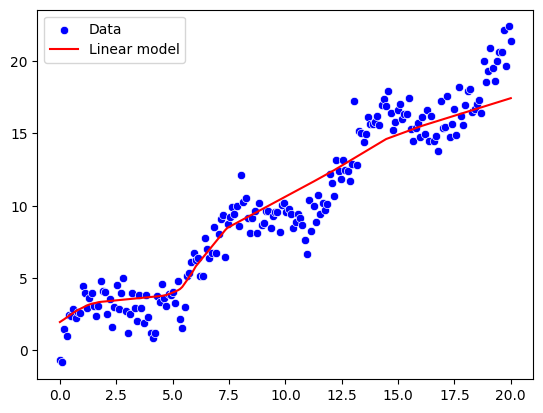

In [ ]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
